<font color="Black" size=+6.5><b>Icelandic stock exchange</b></font>

<font color="Black" size=+2.5><b>Portfolio theory</b></font>

In [147]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import yfinance as yf
import datetime 
import scipy.optimize as optimize
from scipy.stats.mstats import gmean
import quandl
import MST
import Clustering
import pandas_datareader as pdr

In [148]:
# Defining the period for the stocks

start = datetime.datetime(2018,6,25) 
end   = datetime.datetime(2022,1,25) 

**Import the data from Yahoo Finance**

In [149]:
# Data from Yahoo Finance

ticks = ['SYN.IC','SKEL.IC','ORIGO.IC','VIS.IC','SJOVA.IC','SIMINN.IC','REITIR.IC','REGINN.IC','KVIKA.IC','ICESEA.IC','HAGA.IC','FESTI.IC','EIM.IC','EIK.IC','BRIM.IC','ARION.IC','MAREL.IC','ICEAIR.IC','^OMXIPI']

print('Downloading daily data for', str(ticks), 'from', start.strftime('%Y-%m-%d'), 'to', 
        end.strftime('%Y-%m-%d'))
stocks = yf.download(ticks, start=start, end=end, interval='1wk')

df_returns = pd.DataFrame(np.nan, index=stocks.index, columns=ticks)

[*********************100%***********************]  19 of 19 completed


In [150]:
tickers = ['SYN.IC','SKEL.IC','ORIGO.IC','VIS.IC','SJOVA.IC','SIMINN.IC','REITIR.IC','REGINN.IC','KVIKA.IC','ICESEA.IC','HAGA.IC','FESTI.IC','EIM.IC','EIK.IC','BRIM.IC','ARION.IC','MAREL.IC','ICEAIR.IC']

dataset_list = pd.DataFrame()
for ticker in tickers:
    stats = pdr.get_quote_yahoo(ticker)['marketCap']
    dataset_list = dataset_list.append(stats)
dataset_list = dataset_list.reset_index().rename(columns={"index":"ticker"})
dataset_list = dataset_list.groupby('ticker').sum()
 
market_cap = dataset_list.T
market_cap = market_cap.reset_index()
market_cap

ticker,index,marketCap
0,SYN.IC,1.926637e+10
1,SKEL.IC,2.838639e+10
2,ORIGO.IC,2.827500e+10
3,VIS.IC,3.648100e+10
4,SJOVA.IC,5.823068e+10
5,SIMINN.IC,1.034611e+11
6,REITIR.IC,6.811665e+10
7,REGINN.IC,5.408340e+10
8,KVIKA.IC,5.181220e+10
9,ICESEA.IC,4.346404e+10


<BarContainer object of 18 artists>

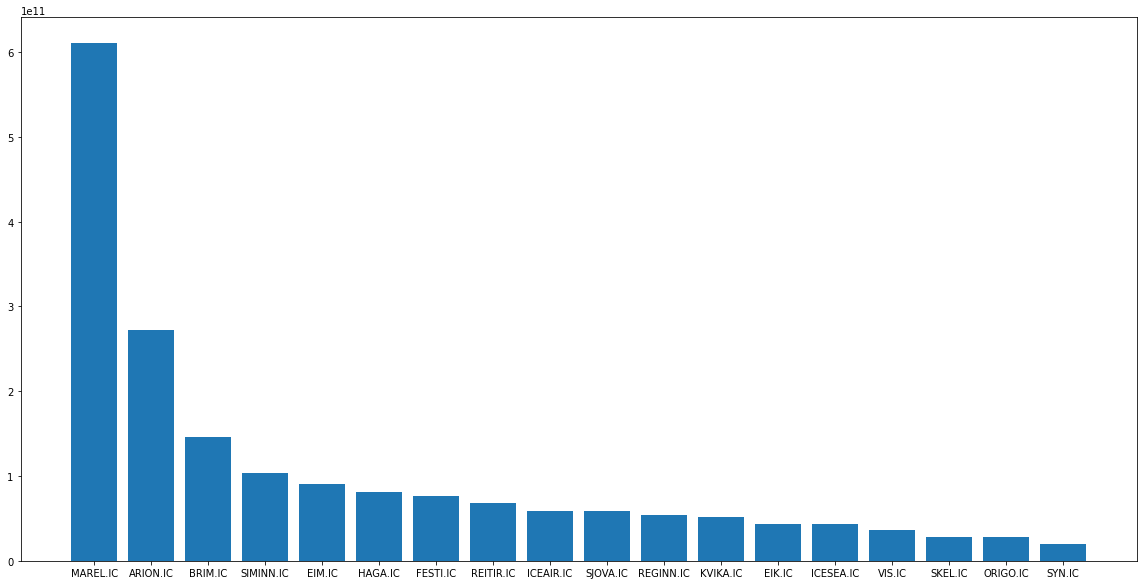

In [151]:
market_cap = market_cap.sort_values(by='marketCap', ascending=False)

fig = plt.figure(figsize=(20,10))
plt.bar(market_cap["index"], market_cap["marketCap"])

In [152]:
dataset_list = pd.DataFrame()

for ticker in tickers:
    stats = pdr.get_quote_yahoo(ticker)['sharesOutstanding']
    dataset_list = dataset_list.append(stats)
dataset_list = dataset_list.reset_index().rename(columns={"index":"ticker"})
dataset_list = dataset_list.groupby('ticker').sum()
 
shares_out = dataset_list.T
shares_out = shares_out.reset_index()
shares_out



ticker,index,sharesOutstanding
0,SYN.IC,2.964410e+08
1,SKEL.IC,1.819640e+09
2,ORIGO.IC,4.350000e+08
3,VIS.IC,1.910000e+09
4,SJOVA.IC,1.540400e+09
5,SIMINN.IC,8.416650e+09
6,REITIR.IC,7.784760e+08
7,REGINN.IC,1.659000e+09
8,KVIKA.IC,2.141000e+09
9,ICESEA.IC,2.714480e+09


<BarContainer object of 18 artists>

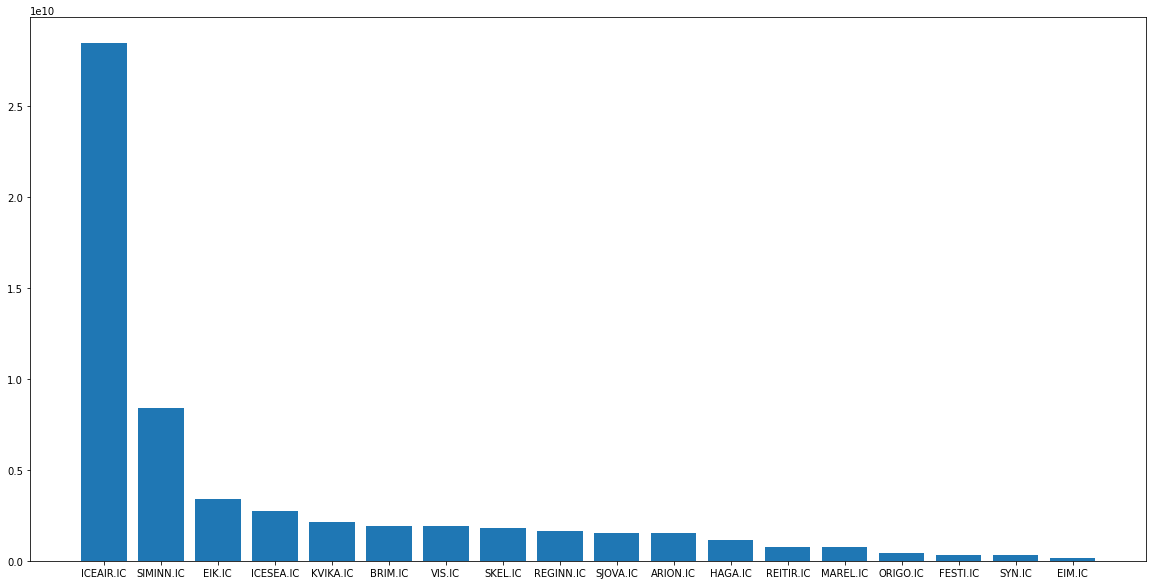

In [153]:
shares_out = shares_out.sort_values(by='sharesOutstanding', ascending=False)

fig = plt.figure(figsize=(20,10))
plt.bar(shares_out["index"], shares_out["sharesOutstanding"])

In [154]:
from pandas_datareader import data
data.get_quote_yahoo(tickers)['trailingPE']

SYN.IC               NaN
SKEL.IC        28.623854
ORIGO.IC       40.000000
VIS.IC          4.269111
SJOVA.IC        4.745591
SIMINN.IC      16.851595
REITIR.IC       9.794045
REGINN.IC      10.650113
KVIKA.IC        9.938399
ICESEA.IC    7849.999500
HAGA.IC        19.577465
FESTI.IC       18.025017
EIM.IC       3412.162000
EIK.IC          9.439528
BRIM.IC      2814.814700
ARION.IC       11.106998
MAREL.IC     6328.124500
ICEAIR.IC            NaN
Name: trailingPE, dtype: float64

# Data Analysis


In [155]:
df_volume = stocks["Volume"]
df_volume= df_volume.dropna(how='all')
df_volume = (df_volume.ffill()+df_volume.bfill())/2
df_volume = df_volume.drop(columns=['^OMXIPI'])
df_volume

,ARION.IC,BRIM.IC,EIK.IC,EIM.IC,FESTI.IC,HAGA.IC,ICEAIR.IC,ICESEA.IC,KVIKA.IC,MAREL.IC,ORIGO.IC,REGINN.IC,REITIR.IC,SIMINN.IC,SJOVA.IC,SKEL.IC,SYN.IC,VIS.IC
Date,,,,,,,,,,,,,,,,,,
2018-06-25,5884181.0,202455.0,67916933.0,1338514.0,4542623.0,8891026.0,5.071722e+07,3124612.0,29661400.0,5902437.0,3023546.0,26796412.0,6729954.0,49635454.0,12857198.0,62101026.0,2984000.0,10013416.0
2018-07-02,9597932.0,139479.0,15375030.0,309600.0,2567296.0,6766952.0,2.945549e+07,10750000.0,37694189.0,1827820.0,620782.0,5015061.0,3752368.0,41825362.0,35603537.0,24016866.0,422823.0,7710000.0
2018-07-09,1496983.0,101280.0,42645287.0,840902.0,2385021.0,7597386.0,1.287924e+08,8300000.0,1700000.0,1303688.0,188696.0,3300967.0,3687992.0,63622136.0,11206441.0,15000213.0,467124.0,8581950.0
2018-07-16,1686965.0,12606.0,35762040.0,52082960.0,3701900.0,2595677.0,7.056798e+07,2400000.0,14890010.0,2183199.0,2980500.0,4996340.0,1933465.0,48219200.0,7000000.0,42082463.0,800500.0,13181500.0
2018-07-23,2181256.0,14565.0,4240834.0,1178818.0,5460978.0,7768536.0,3.391400e+07,51736.0,4383339.0,8222105.0,4200956.0,2963248.0,496427.0,50875584.0,22180283.0,52543996.0,1018928.0,36764104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,12242819.0,2354734.0,1304312.0,1086669.0,2546572.0,6700618.0,1.264753e+09,38294441.0,57310351.0,3873733.0,12068719.0,6279719.0,9168630.0,44527725.0,3832190.0,1663186.0,7846238.0,35815892.0
2022-01-03,21388782.0,5524139.0,9547945.0,750682.0,6990064.0,9875353.0,1.124948e+09,37808915.0,82260164.0,1909486.0,5348877.0,3870893.0,8152957.0,36312087.0,13071785.0,6386983.0,2203865.0,18941690.0
2022-01-10,13439904.0,5817098.0,22852935.0,4277284.0,5765018.0,11741259.0,2.936469e+08,3226455.0,98769471.0,1701030.0,104076458.0,9348037.0,8565943.0,173068041.0,15646219.0,28005939.0,6149821.0,62216123.0


<BarContainer object of 18 artists>

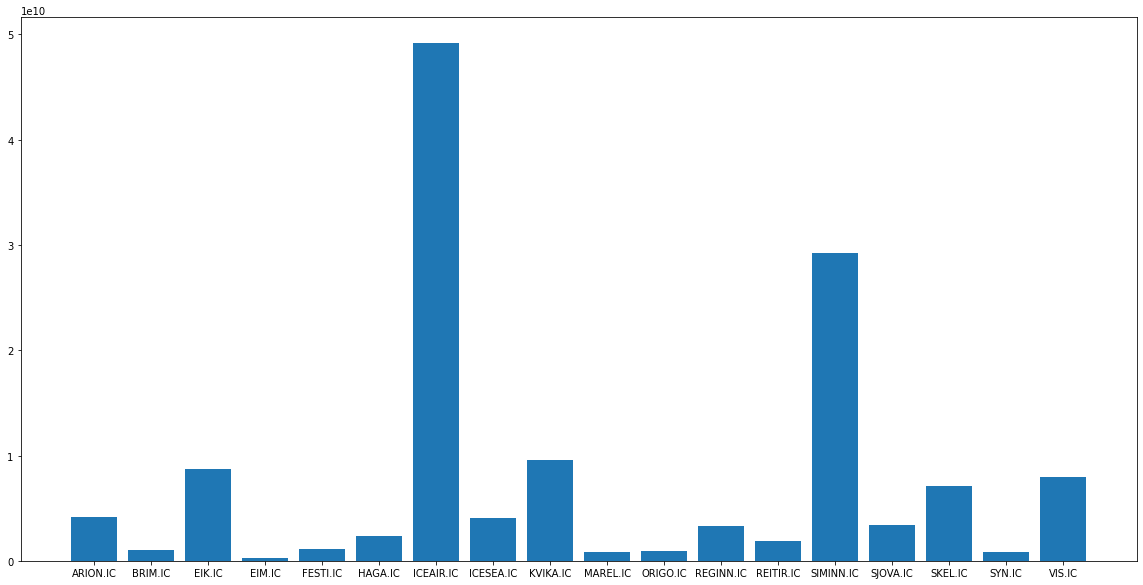

In [156]:
a = df_volume.columns

fig = plt.figure(figsize=(20,10))
plt.bar(a, df_volume.sum())

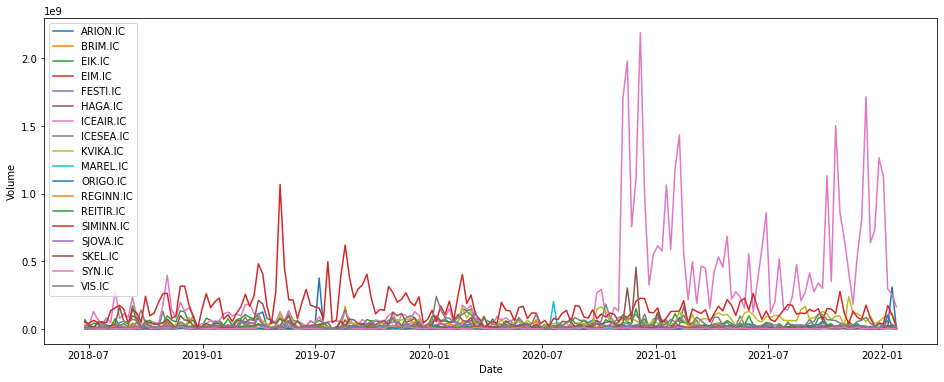

In [157]:
a = df_volume.columns


plt.figure(figsize=(16,6))
for i in range(18):
    plt.plot(((df_volume[a[i]])), label = a[i])
    plt.legend(loc="upper left")
    plt.xlabel('Date')
    plt.ylabel('Volume')

In [158]:
# Dataframe with closing price for each stock

df = stocks['Adj Close']

In [159]:
# Drop all rows where all columns have NaNs

df= df.dropna(how='all')


In [160]:
# Look at the rows with some NaNs

df[df.isna().any(axis=1)]

,ARION.IC,BRIM.IC,EIK.IC,EIM.IC,FESTI.IC,HAGA.IC,ICEAIR.IC,ICESEA.IC,KVIKA.IC,MAREL.IC,ORIGO.IC,REGINN.IC,REITIR.IC,SIMINN.IC,SJOVA.IC,SKEL.IC,SYN.IC,VIS.IC,^OMXIPI
Date,,,,,,,,,,,,,,,,,,,
2019-05-27,78.431190,32.000000,9.064868,174.920456,121.727875,41.929161,10.080,9.059279,11.530000,NaN,25.197378,22.799999,84.631248,4.333008,16.765480,7.899897,35.799999,13.040000,1478.550049
2019-06-03,77.938530,33.000000,9.084511,180.866760,117.621971,41.244999,10.960,9.119274,11.430000,NaN,25.148260,22.799999,84.144302,4.303532,16.765480,7.757127,36.000000,12.860000,1456.810059
2019-06-10,76.854683,33.400002,8.789878,186.317535,118.829590,40.951790,10.660,9.149272,11.460000,NaN,25.541203,22.299999,82.099129,4.411612,16.675343,7.852307,35.799999,12.770000,1444.599976
2019-06-17,76.903954,33.700001,8.888089,191.272797,121.727875,42.299999,10.930,9.149272,11.410000,NaN,25.197378,22.600000,83.170410,4.568818,16.720411,7.899897,35.049999,12.950000,1467.290039
2019-06-24,76.312759,33.599998,8.652383,189.786209,122.693970,43.299999,9.900,8.949287,11.030000,NaN,25.148260,22.250000,82.586075,4.480390,16.945753,7.804717,35.000000,12.900000,1445.260010
2019-07-01,75.376709,33.450001,8.563993,181.857803,121.051613,43.000000,10.290,8.639313,10.800000,NaN,24.558847,21.850000,82.586075,4.450913,16.720411,7.766645,34.200001,12.650000,1436.329956
2019-07-08,76.460556,33.450001,8.328286,176.902557,121.727875,42.799999,9.210,8.849297,10.300000,NaN,24.558847,21.799999,82.391296,4.480390,16.585205,7.785681,33.900002,12.820000,1433.589966
2019-07-15,78.135597,35.599998,8.534529,178.884659,123.660065,42.799999,9.050,8.839296,10.730000,NaN,24.558847,22.150000,82.391296,4.470564,16.540138,7.728573,32.799999,12.900000,1490.410034
2019-09-02,78.529716,NaN,7.856874,176.902557,121.244827,40.000000,6.850,9.519243,10.720000,584.896118,23.134434,21.200001,74.307991,4.617945,14.962740,7.519178,27.600000,11.600000,1440.699951


In [161]:
# Fill the stocks with nans values, by taking the value above and below, divided by 2

df = (df.ffill()+df.bfill())/2

#to fill the entire column with the last value to the end
#df = df.bfill().ffill()

In [162]:
returns = df.pct_change()

#log returns
#returns = df.pct_change().apply(lambda x: np.log(1+x))

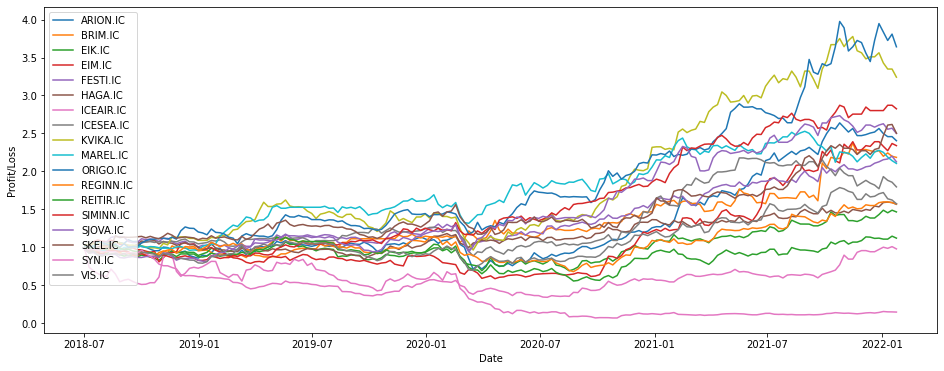

In [163]:
b = returns.columns

plt.figure(figsize=(16,6))
for i in range(18):
    plt.plot(((returns[b[i]]+1).cumprod())*1, label = b[i])
    plt.legend(loc="upper left")
    plt.xlabel('Date')
    plt.ylabel('Profit/Loss')

In [164]:
# Functions to calculate returns and remove NaNs
def calc_returns(prices):
    returns = (prices / np.roll(prices, 1) - 1)[1:]
    returns = returns.dropna()
    return returns
    
def calc_logreturns(prices):
    returns = (np.log(prices)-np.log(np.roll(prices, 1)))[1:]
    returns = returns.dropna()
    return returns


# Function to calculate average returns using the geometric mean
def calc_geomean(returns):
    return (np.prod(1 + returns))**(1/len(returns)) - 1


# Functions to annualize returns and std.dev.
def annualize_returns(returns, data_freq='weekly'):
    if data_freq=='weekly':
        return (1+returns)**52-1
    elif data_freq=='daily':
        return (1+returns)**252-1
    
def annualize_logreturns(returns, data_freq='weekly'):
    if data_freq=='weekly':
        return returns*52
    elif data_freq=='daily':
        return returns*252

def annualize_stddev(stddev, data_freq='weekly'):
    if data_freq=='weekly':
        return stddev*np.sqrt(52)
    elif data_freq=='daily':
        return stddev*np.sqrt(252)

In [165]:
for i in range(len(b)):
    returns_1 = calc_returns(df[b[i]])
    df_returns[b[i]] = returns_1
    avr_return = calc_geomean(returns_1)
    ann_avr_return = annualize_returns(avr_return, data_freq='weekly')
    print(f'  {b[i]}: {100*ann_avr_return:.4f}%' )

  ARION.IC: 27.6266%
  BRIM.IC: 24.2737%
  EIK.IC: 11.2248%
  EIM.IC: 26.6573%
  FESTI.IC: 23.3375%
  HAGA.IC: 13.3055%
  ICEAIR.IC: -41.3337%
  ICESEA.IC: 17.6830%
  KVIKA.IC: 38.6800%
  MAREL.IC: 22.9960%
  ORIGO.IC: 43.2436%
  REGINN.IC: 13.3514%
  REITIR.IC: 3.2234%
  SIMINN.IC: 33.4742%
  SJOVA.IC: 29.0271%
  SKEL.IC: 29.0646%
  SYN.IC: -0.5864%
  VIS.IC: 13.4395%
  ^OMXIPI: 21.5815%


In [166]:
stats = pd.DataFrame(index = returns.columns, columns  =["Ave Hist Returns (Ann)", "Stdev (Ann)", 'Min', 'Max', 
                                                      'Range', 'Kurtosis',
                                                      'Skewness',"Sharpe"])

In [167]:
def calc_mean(returns):
    return (np.prod(1 + returns))**(1/len(returns)) - 1

weeklymean = calc_mean(returns)
weeklycov = returns.cov()

annual_mean = (1+weeklymean)**52-1

annual_cov = weeklycov*52
print("The annual mean is:\n", annual_mean)
print("\nThe annual cov matrix:\n", annual_cov)

The annual mean is:
 ARION.IC     0.274611
BRIM.IC      0.241301
EIK.IC       0.111619
EIM.IC       0.264982
FESTI.IC     0.232000
HAGA.IC      0.132303
ICEAIR.IC   -0.411670
ICESEA.IC    0.175811
KVIKA.IC     0.384390
MAREL.IC     0.228606
ORIGO.IC     0.429701
REGINN.IC    0.132759
REITIR.IC    0.032060
SIMINN.IC    0.332694
SJOVA.IC     0.288523
SKEL.IC      0.288896
SYN.IC      -0.005833
VIS.IC       0.133635
^OMXIPI      0.193279
dtype: float64

The annual cov matrix:
            ARION.IC   BRIM.IC    EIK.IC    EIM.IC  FESTI.IC   HAGA.IC  \
ARION.IC   0.085107  0.011231  0.032967  0.024320  0.024723  0.010416   
BRIM.IC    0.011231  0.080492  0.013067  0.026541  0.008796  0.008260   
EIK.IC     0.032967  0.013067  0.081830  0.033437  0.034832  0.023932   
EIM.IC     0.024320  0.026541  0.033437  0.116339  0.019747  0.019016   
FESTI.IC   0.024723  0.008796  0.034832  0.019747  0.050425  0.027805   
HAGA.IC    0.010416  0.008260  0.023932  0.019016  0.027805  0.034524   
ICEAIR.IC 

In [168]:
stats["Ave Hist Returns (Ann)"] = annual_mean
stats["Stdev (Ann)"] = np.sqrt(np.diag(annual_cov))
stats["Min"] = returns.min()
stats["Max"] = returns.max()
stats["Range"] = abs(returns.min()-returns.max())
stats["Kurtosis"] = returns.kurtosis()
stats["Skewness"] = returns.skew()
stats["Sharpe"] = stats["Ave Hist Returns (Ann)"]/stats["Stdev (Ann)"]

In [169]:
stats

,Ave Hist Returns (Ann),Stdev (Ann),Min,Max,Range,Kurtosis,Skewness,Sharpe
ARION.IC,0.274611,0.291731,-0.160686,0.125926,0.286612,2.230488,-0.368614,0.941316
BRIM.IC,0.241301,0.283712,-0.095238,0.309091,0.404329,18.765724,2.800285,0.850515
EIK.IC,0.111619,0.286060,-0.148230,0.160902,0.309132,2.260369,0.021282,0.390195
EIM.IC,0.264982,0.341085,-0.146845,0.179012,0.325857,3.478182,1.027548,0.776879
FESTI.IC,0.232000,0.224556,-0.116319,0.113208,0.229527,2.180017,0.003463,1.033151
HAGA.IC,0.132303,0.185807,-0.096304,0.071028,0.167332,0.615992,0.030932,0.712045
ICEAIR.IC,-0.411670,0.730937,-0.382022,0.444444,0.826467,5.346970,0.674024,-0.563209
ICESEA.IC,0.175811,0.237256,-0.138702,0.146049,0.284752,4.064753,0.483645,0.741016
KVIKA.IC,0.384390,0.274947,-0.109300,0.138158,0.247458,1.223184,0.480434,1.398052
MAREL.IC,0.228606,0.225286,-0.103448,0.094879,0.198328,1.516673,-0.110834,1.014739


# Simple mean variance plot

In [110]:
#- How many assests to include in each portfolio
n_assets = 5
#-- How many portfolios to generate
n_portfolios = 1000

#-- Initialize empty list to store mean-variance pairs for plotting
mean_variance_pairs = []

np.random.seed(75)
#-- Loop through and generate lots of random portfolios
for i in range(n_portfolios):
    #- Choose assets randomly without replacement
    assets = np.random.choice(list(returns.columns), n_assets, replace=False)
    #- Choose weights randomly
    weights = np.random.rand(n_assets)
    #- Ensure weights sum to 1
    weights = weights/sum(weights)

    #-- Loop over asset pairs and compute portfolio return and variance
    #- https://quant.stackexchange.com/questions/43442/portfolio-variance-explanation-for-equation-investments-by-zvi-bodie
    portfolio_E_Variance = 0
    portfolio_E_Return = 0
    for i in range(len(assets)):
        portfolio_E_Return += weights[i] * annual_mean.loc[assets[i]]
        for j in range(len(assets)):
            #-- Add variance/covariance for each asset pair
            #- Note that when i==j this adds the variance
            portfolio_E_Variance += weights[i] * weights[j] * annual_cov.loc[assets[i], assets[j]]
            
    #-- Add the mean/variance pairs to a list for plotting
    mean_variance_pairs.append([portfolio_E_Return, portfolio_E_Variance])

In [111]:
import plotly.graph_objects as go
#-- Plot the risk vs. return of randomly generated portfolios
#- Convert the list from before into an array for easy plotting
mean_variance_pairs = np.array(mean_variance_pairs)
risk_free_rate=0 #-- Include risk free rate here for sharpe ratio

#-- Create Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:,1]**0.5, 
                         y=mean_variance_pairs[:,0], 
                      #- Add color scale for sharpe ratio   
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers'))
#- Add title/labels
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Annualised Risk (Volatility)'),
                  yaxis=dict(title='Annualised Return'),
                  title='Sample of Random Portfolios',
                  coloraxis_colorbar=dict(title="Sharpe Ratio"))

# More complex

In [113]:
# https://towardsdatascience.com/efficient-frontier-in-python-detailed-tutorial-84a304f03e79
# check this out later

# Clustering & Minimum spanning method

In [170]:
returns = returns.drop(columns=['^OMXIPI'])
returns = returns.iloc[1:]


In [171]:
returns[returns.isna().any(axis=1)]

,ARION.IC,BRIM.IC,EIK.IC,EIM.IC,FESTI.IC,HAGA.IC,ICEAIR.IC,ICESEA.IC,KVIKA.IC,MAREL.IC,ORIGO.IC,REGINN.IC,REITIR.IC,SIMINN.IC,SJOVA.IC,SKEL.IC,SYN.IC,VIS.IC
Date,,,,,,,,,,,,,,,,,,


In [172]:
returns

,ARION.IC,BRIM.IC,EIK.IC,EIM.IC,FESTI.IC,HAGA.IC,ICEAIR.IC,ICESEA.IC,KVIKA.IC,MAREL.IC,ORIGO.IC,REGINN.IC,REITIR.IC,SIMINN.IC,SJOVA.IC,SKEL.IC,SYN.IC,VIS.IC
Date,,,,,,,,,,,,,,,,,,
2018-07-02,0.022274,-0.002933,-0.001125,-0.039080,-0.013514,-0.009989,-0.023077,-0.009840,0.026144,0.007833,0.000000,-0.004785,-0.012422,-0.021789,-0.027864,-0.009404,-0.016442,-0.012295
2018-07-09,-0.059633,-0.005882,-0.028153,-0.026316,-0.041096,-0.008969,-0.246457,-0.027950,0.012739,-0.015544,-0.022167,-0.016827,0.005031,-0.045721,-0.049681,-0.026899,-0.013678,-0.066390
2018-07-16,0.006098,0.013314,-0.029548,0.149877,0.014286,0.004525,-0.060606,-0.015974,0.006289,0.030263,0.007557,-0.009780,-0.008761,0.000000,0.008713,0.011382,0.001541,0.031111
2018-07-23,0.000000,-0.013139,-0.014925,0.019231,-0.004695,0.021396,-0.054505,-0.006493,0.006250,-0.070243,0.092500,-0.017284,-0.003788,-0.002457,-0.037874,0.009646,-0.010769,-0.054310
2018-07-30,0.060606,0.011834,-0.020606,-0.014675,0.113208,0.014333,-0.044706,0.027451,-0.006211,0.008242,-0.016018,-0.015075,0.003802,-0.024631,0.004834,-0.009554,-0.021773,-0.017320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.018667,0.006494,0.033058,0.000000,0.008850,-0.007353,0.057307,-0.027027,0.015267,0.009259,0.059701,0.024691,0.002915,0.000000,0.010638,0.007194,0.031746,0.019608
2022-01-03,-0.026178,-0.032258,0.040000,-0.025743,0.013158,0.037037,0.089431,0.090278,-0.037594,-0.011468,-0.028169,0.006024,-0.011628,0.000000,0.006579,0.071429,0.030769,0.009615
2022-01-10,-0.016129,0.020000,-0.023077,-0.024390,0.004329,0.003571,-0.029851,-0.025478,-0.023438,-0.027842,-0.028986,0.000000,0.000000,0.025000,-0.027451,0.056667,-0.014925,-0.047619


In [173]:
split=int(len(returns)*0.5)
training=returns[:split]
test=returns[split:]

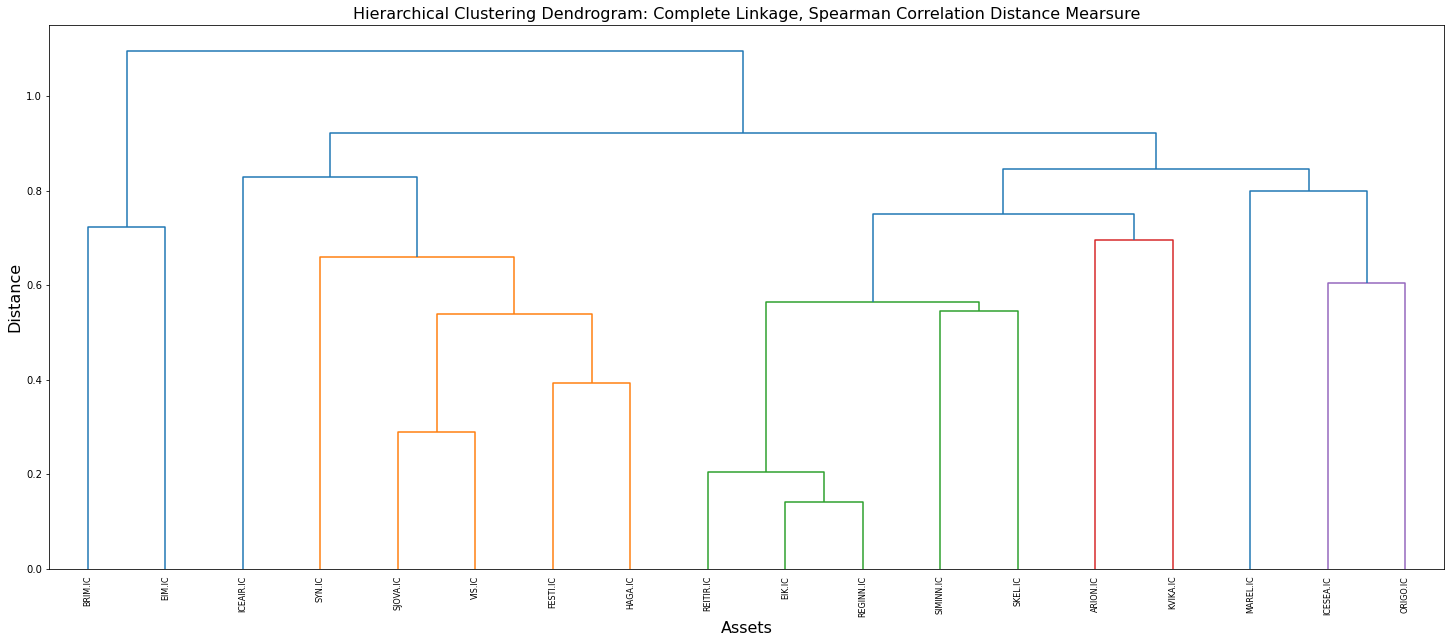

,Complete_Corr,Cluster
ARION.IC,3,Cluster 3
BRIM.IC,1,Cluster 1
EIK.IC,3,Cluster 3
EIM.IC,1,Cluster 1
FESTI.IC,2,Cluster 2
HAGA.IC,2,Cluster 2
ICEAIR.IC,2,Cluster 2
ICESEA.IC,3,Cluster 3
KVIKA.IC,3,Cluster 3
MAREL.IC,3,Cluster 3


In [175]:
#subset, subset_df, corr_avg, PDI = MST.MinimumSpanningTree(best_200)
cluster_df = Clustering.Cluster(training, 3, True)

cluster_df

In [178]:
cluster_1 = cluster_df[(cluster_df["Cluster"] == "Cluster 1")]
cluster_1_T = cluster_1.T
cluster_1 = training[cluster_1_T.columns]
cluster_1_T.columns

Index(['BRIM.IC', 'EIM.IC'], dtype='object')

In [179]:
cluster_2 = cluster_df[(cluster_df["Cluster"] == "Cluster 2")]
cluster_2_T = cluster_2.T
cluster_2 = training[cluster_2_T.columns]
cluster_2_T.columns

Index(['FESTI.IC', 'HAGA.IC', 'ICEAIR.IC', 'SJOVA.IC', 'SYN.IC', 'VIS.IC'], dtype='object')

In [180]:
cluster_3 = cluster_df[(cluster_df["Cluster"] == "Cluster 3")]
cluster_3_T = cluster_3.T
cluster_3 = training[cluster_3_T.columns]
cluster_3_T.columns

Index(['ARION.IC', 'EIK.IC', 'ICESEA.IC', 'KVIKA.IC', 'MAREL.IC', 'ORIGO.IC',
       'REGINN.IC', 'REITIR.IC', 'SIMINN.IC', 'SKEL.IC'],
      dtype='object')

In [188]:
subset, subset_df, corr_avg, PDI = MST.MinimumSpanningTree(cluster_2)
print("Average correlation of assets after",1,"iterations:",corr_avg)
print("Number of assets after",1,"iterations:",len(subset))

# 6 iterations of MST
for i in range (1,3):
    subset, subset_df, corr_avg, PDI = MST.MinimumSpanningTree(subset_df)
    print("\nAverage correlation of assets after",i+1,"iterations:",corr_avg)
    print("Number of assets after",i+1,"iterations:",len(subset))
print("\nMST subset of assets: \n")
subset

Average correlation of assets after 1 iterations: 0.49539704683009617
Number of assets after 1 iterations: 3

Average correlation of assets after 2 iterations: 0.5855139228235802
Number of assets after 2 iterations: 2

Average correlation of assets after 3 iterations: 0.5855139228235802
Number of assets after 3 iterations: 2

MST subset of assets: 



['ICEAIR.IC', 'SYN.IC']

In [189]:
subset, subset_df, corr_avg, PDI = MST.MinimumSpanningTree(cluster_3)
print("Average correlation of assets after",1,"iterations:",corr_avg)
print("Number of assets after",1,"iterations:",len(subset))

# 6 iterations of MST
for i in range (1,3):
    subset, subset_df, corr_avg, PDI = MST.MinimumSpanningTree(subset_df)
    print("\nAverage correlation of assets after",i+1,"iterations:",corr_avg)
    print("Number of assets after",i+1,"iterations:",len(subset))
print("\nMST subset of assets: \n")
subset

Average correlation of assets after 1 iterations: 0.4428926351012206
Number of assets after 1 iterations: 4

Average correlation of assets after 2 iterations: 0.5890810391070435
Number of assets after 2 iterations: 2

Average correlation of assets after 3 iterations: 0.5890810391070435
Number of assets after 3 iterations: 2

MST subset of assets: 



['KVIKA.IC', 'MAREL.IC']

In [188]:
train_cluster = training[['ARION.IC', 'ICESEA.IC', 'SYN.IC','BRIM.IC','MAREL.IC']]
test_cluster = test[['ARION.IC', 'ICESEA.IC', 'SYN.IC','BRIM.IC','MAREL.IC']]

In [189]:
# Training
weeklymean_train_cluster = calc_mean(train_cluster)
weeklycov_train_cluster  = train_cluster.cov()
annual_mean_train_cluster = (1+weeklymean_train_cluster)**52-1
annual_cov_train_cluster  = weeklycov_train_cluster*52

#Testing
weeklymean_test_cluster = calc_mean(test_cluster)
weeklycov_test_cluster = test_cluster.cov()
annual_mean_test_cluster = (1+weeklymean_test_cluster)**52-1
annual_cov_test_cluster = weeklycov_test_cluster*52

In [190]:
w_eq = np.empty(5)
for i in range(5):
    w_eq[i] = 1/5
    
eqwp_return_train_cluster = np.sum(np.transpose(w_eq)*np.array(annual_mean_train_cluster))
eqwp_risk_train_cluster = np.sqrt(np.dot(np.transpose(w_eq), np.dot(annual_cov_train_cluster, w_eq)))

eqwp_return_test_cluster = np.sum(np.transpose(w_eq)*np.array(annual_mean_test_cluster))
eqwp_risk_test_cluster = np.sqrt(np.dot(np.transpose(w_eq), np.dot(annual_cov_test_cluster, w_eq)))


print("------Train------")
print("Return: ", eqwp_return_train_cluster)
print("Risk: ", eqwp_risk_train_cluster)
print("Sharp ratio: ",eqwp_return_train_cluster/eqwp_risk_train_cluster )
print("------Test------")
print("Return: ", eqwp_return_test_cluster)
print("Risk: ", eqwp_risk_test_cluster)
print("Sharp ratio: ",eqwp_return_test_cluster/eqwp_risk_test_cluster )

------Train------
Return:  0.03854416090463622
Risk:  0.10565677653613434
Sharp ratio:  0.3648053836987372
------Test------
Return:  0.34888598302778673
Risk:  0.20340996759628827
Sharp ratio:  1.7151862671755966


<function matplotlib.pyplot.show(close=None, block=None)>

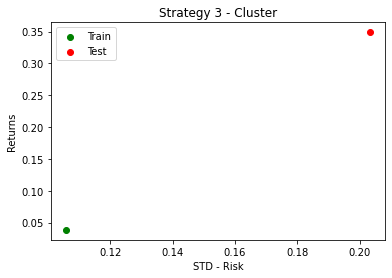

In [191]:
plt.scatter(eqwp_risk_train_cluster, eqwp_return_train_cluster, color = 'green', label = "Train")
plt.scatter(eqwp_risk_test_cluster, eqwp_return_test_cluster, color= 'red', label = "Test")
plt.legend()
plt.title("Strategy 3 - Cluster")
#plt.xlim(0, 0.1)
#plt.ylim(0, 0.1)
plt.xlabel('STD - Risk')
plt.ylabel('Returns')

plt.show

In [192]:
weights = [1/5,1/5,1/5,1/5,1/5] 
test_cluster["portfolio"] = test_cluster.dot(weights)
daily_cum_ret_3 = (1 + test_cluster).cumprod()


C:\Users\bjark\Anaconda3\envs\BjarkiLord\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Strategy 3
maximum drawdown:  -0.23148288909291181


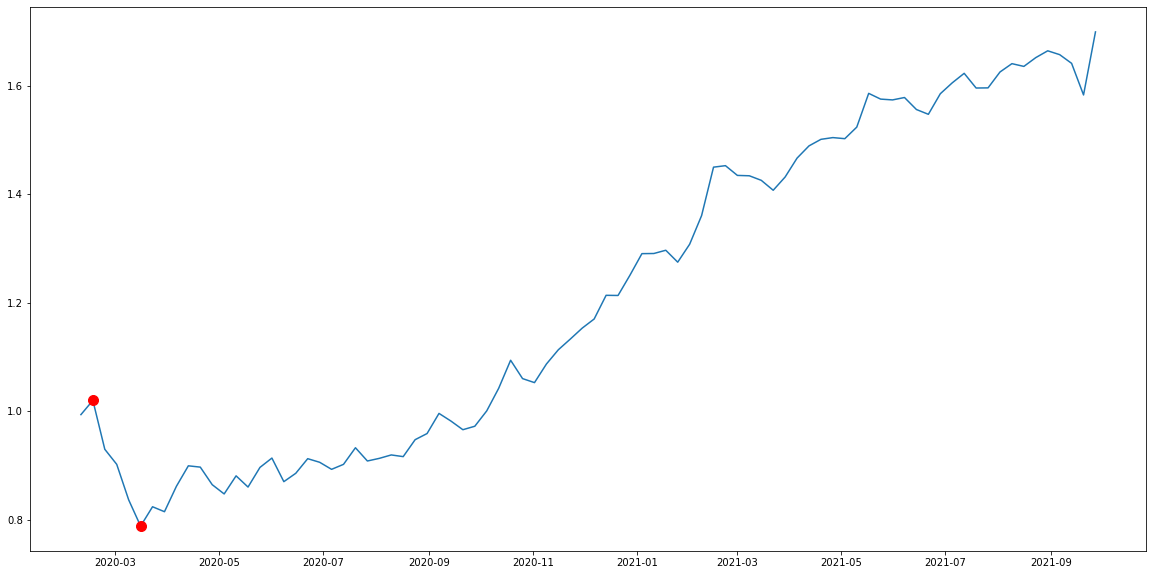

In [194]:
print("Strategy 3")

xs = daily_cum_ret_3['portfolio']
i = np.argmax(np.maximum.accumulate(xs) - xs) # end of the period
j = np.argmax(xs[:i]) # start of period

fig = plt.figure(figsize=(20,10))
plt.plot(xs)
plt.plot([daily_cum_ret_3.index[i], daily_cum_ret_3.index[j]], [xs.iloc[i], xs.iloc[j]], 'o', color='Red', markersize=10)

print("maximum drawdown: ", daily_cum_ret_3['portfolio'][i] - daily_cum_ret_3['portfolio'][j])